In [11]:
import pandas as pd
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [23]:
# "dataset_combined" klasörüne git
folder_path = "/Users/eyupburakatahanli/Desktop/Tubitak_Air_pol/dataset_combined"
os.chdir(folder_path)
dfs = {}
# tüm CSV dosyalarını al ve oku
for filename in os.listdir():
    if filename.endswith(".csv"):
        # dosya adından DataFrame adını ve dosya adını çıkart
        df_name = filename.split(".")[0].replace(" ", "")
        df = pd.read_csv(filename)
        exec(df_name + " = pd.DataFrame(df)") # DataFrame'i kaydet
        dfs[df_name] = df

/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_55149/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_55149/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_55149/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_55149/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_55149/59790196.py:10: DtypeWarning: Columns (14,15,16) have mixed types. 

In [24]:
#ReadTime sütunu  datetime a dönüştürme ve ay yıl ve gün bilgisini df e ekleme
for district, df in dfs.items():
    dfs[district]['ReadTime'] = pd.to_datetime(dfs[district]['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    dfs[district]["Year"] = dfs[district]["ReadTime"].dt.year
    dfs[district]["Day"] = dfs[district]["ReadTime"].dt.day
    dfs[district]["Month "] = dfs[district]["ReadTime"].dt.month
    #sonraki çalışmalarda 2023 yılına ait bir değişken olduğunu farkettik bunu siliyoruz
    dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
    #aqı endex değeri nan olan tüm değişkenleri siliyoruz
    dfs[district] = dfs[district].dropna(subset=['AQIINDEX_AQI'])

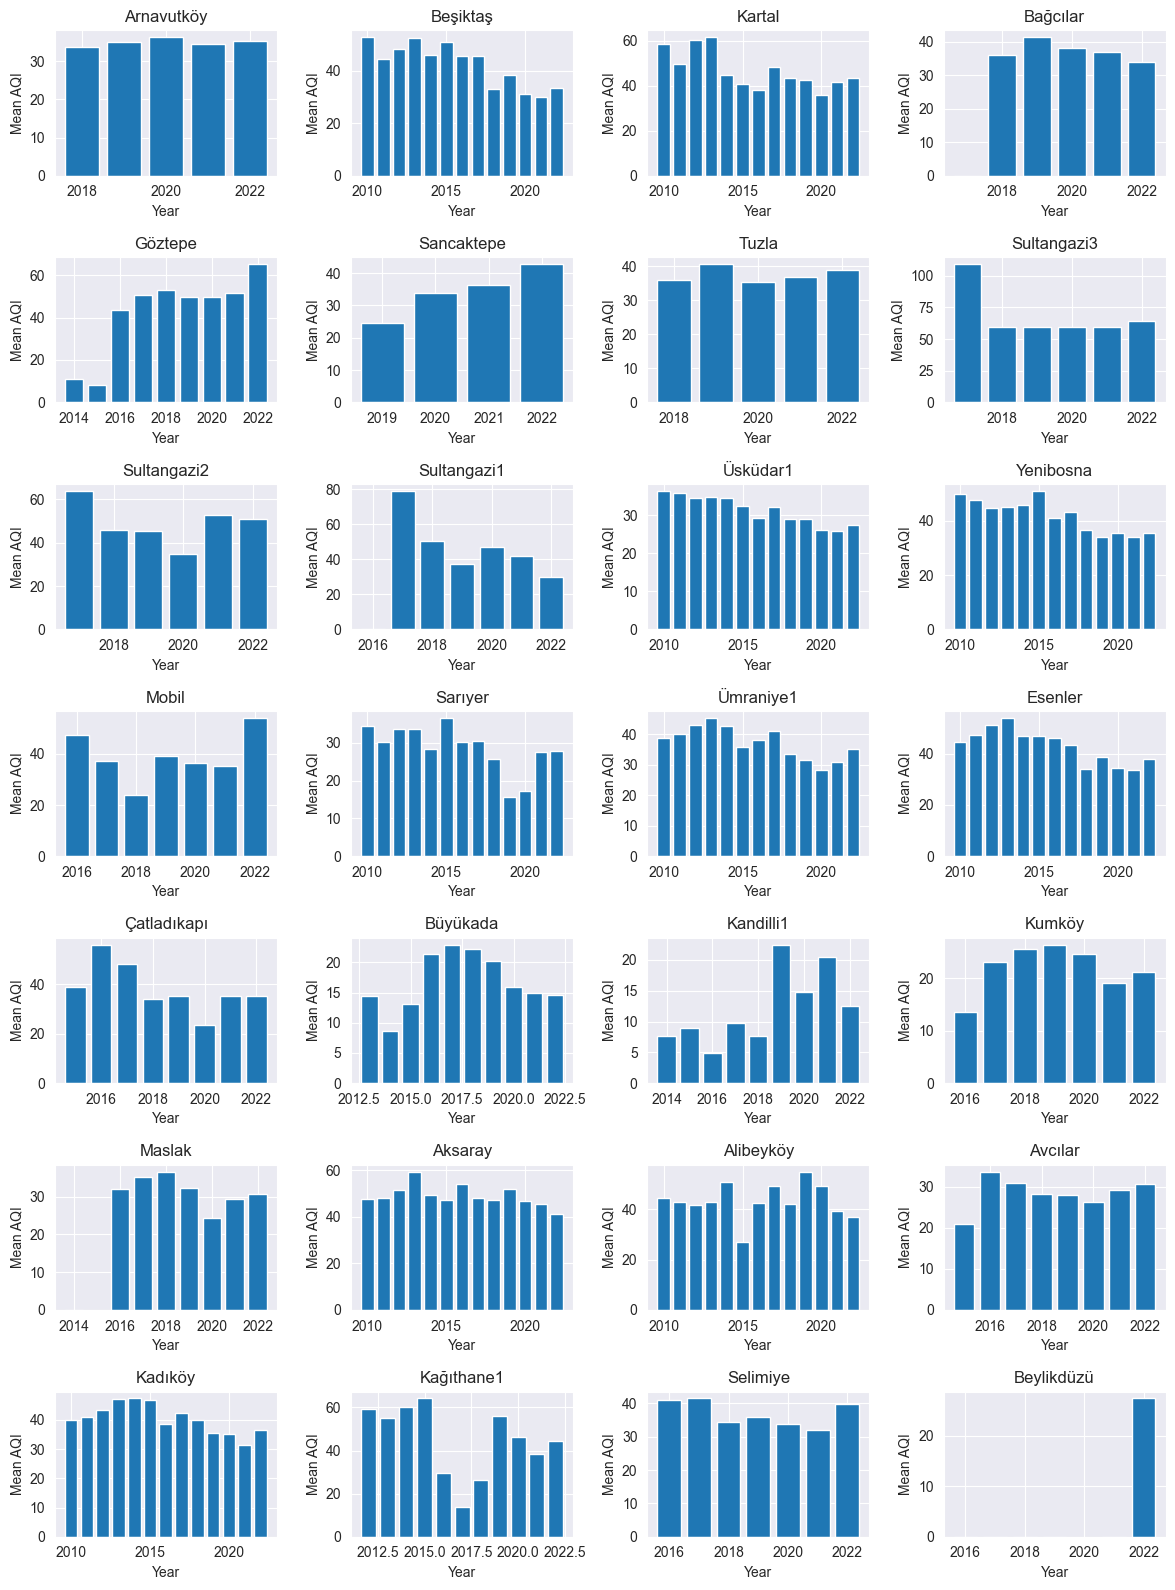

In [66]:
# Grafiklerin çizimi için bir altplot oluşturun
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# Döngü sayacı
count = 0

# Her bir veri çerçevesini grafikleştirin
for district, df in dfs.items():
    # Year sütununu datetime olarak dönüştür
    #df['Readtime'] = pd.to_datetime(df['Readtime'], format='%Y-%m-%d %H:%M:%S')

    # AQI değeri NaN olan satırları sil
    #df = df.dropna(subset=['AQI'])

    # Year sütununa göre AQI değerlerinin ortalamasını hesapla
    mean_aqi = dfs[district].groupby('Year')["AQIINDEX_AQI"].mean()

    # Grafik çizimi
    axs[count // 4, count % 4].bar(mean_aqi.index, mean_aqi)
    axs[count // 4, count % 4].set_xlabel('Year')
    axs[count // 4, count % 4].set_ylabel('Mean AQI')
    axs[count // 4, count % 4].set_title(district)

    # Sayaçı artır
    count += 1

# Grafikleri düzenle
plt.tight_layout()

# Grafikleri göster
plt.show()


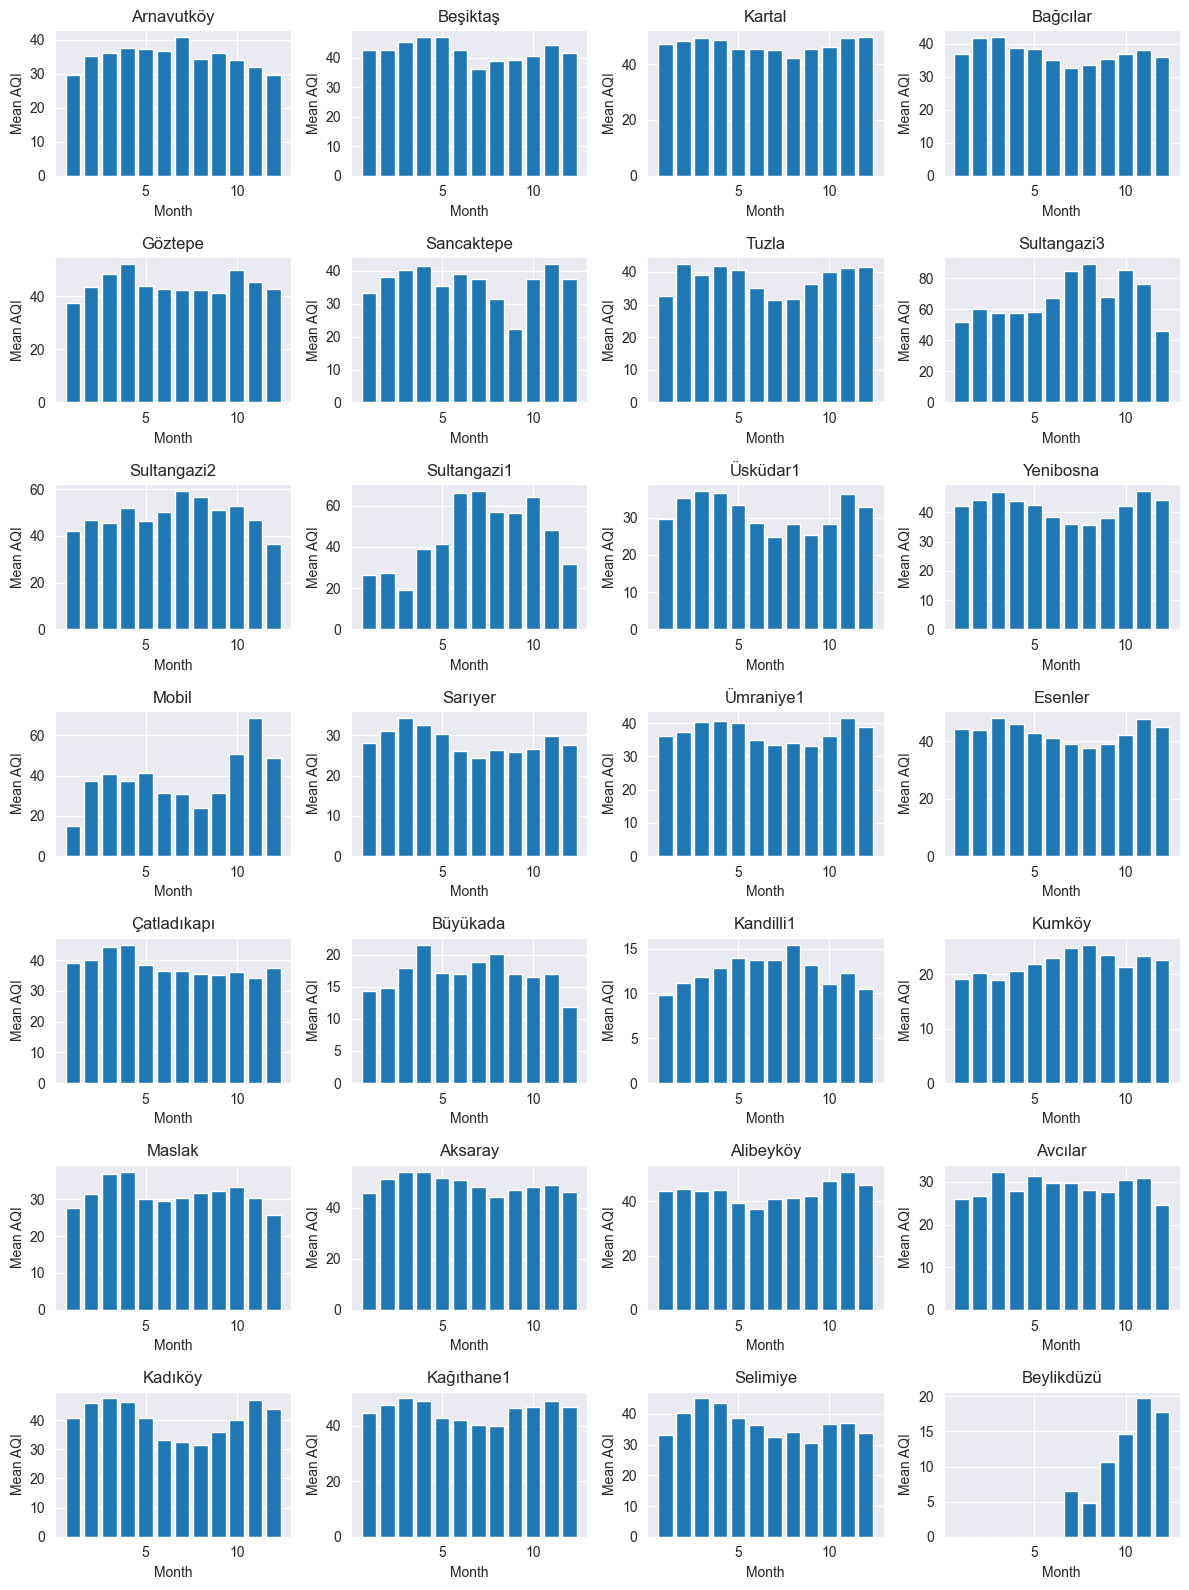

In [74]:
# Grafiklerin çizimi için bir altplot oluşturun
fig, axs = plt.subplots(7, 4, figsize=(12, 16))

# Döngü sayacı
count = 0

# Her bir veri çerçevesini grafikleştirin
for district, df in dfs.items():
    # Year sütununa göre AQI değerlerinin ortalamasını hesapla
    mean_aqi = dfs[district].groupby('Month ')["AQIINDEX_AQI"].mean()

    # Grafik çizimi
    axs[count // 4, count % 4].bar(mean_aqi.index, mean_aqi)
    axs[count // 4, count % 4].set_xlabel('Month')
    axs[count // 4, count % 4].set_ylabel('Mean AQI')
    axs[count // 4, count % 4].set_title(district)

    # Sayaçı artır
    count += 1

# Grafikleri düzenle
plt.tight_layout()

# Grafikleri göster
plt.show()
